In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display

from grafica import *

In [2]:
X = np.array([2, 1, -1])
Y = np.array([3, 1, -3])
cantEj = X.shape[0]  # cantidad de ejemplos de entrada
titulos = np.array(['X','Y'])

In [3]:
#-- conversión de X e Y a vectores columnas para dibujar ---
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
puntos = np.concatenate((X,Y), axis=1)

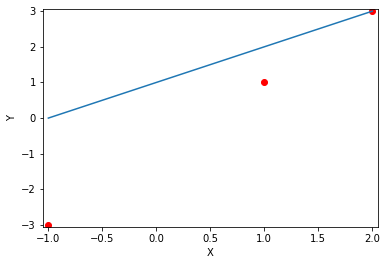

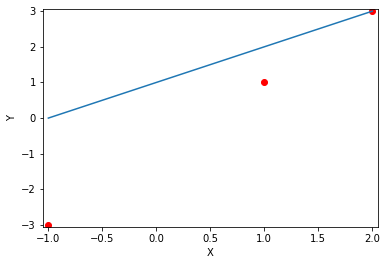

In [4]:
# -- PESOS INICIALES - Determinan la ubicación de la recta
W = np.array([1])
b = 1

dibuPtosRecta(puntos, np.zeros(puntos.shape[0]), np.array([W, -1],dtype=object),b, titulos)

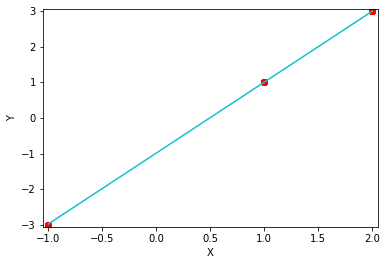

ite 20


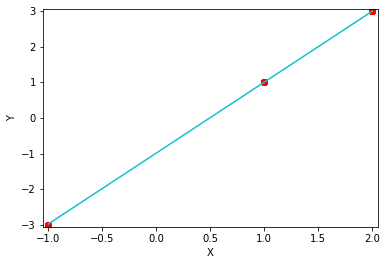

In [5]:
# --- punto, titulos y ph se utilizan sólo para dibujar ---
titulos = np.array(['X','Y'])
ph=0

#--- parámetros del PERCEPTRON ---
MAX_ITE = 50
alfa = 0.1

#--- Los pesos iniciales son aleatorios
W = np.random.uniform(-0.5, 0.5,size=X.shape[1])
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

# --- Entrenamiento del combinador lineal ---
nCantEjemplos = X.shape[0]  # nro. de filas
nAtrib = X.shape[1]         #nro. de columnas

ite = 0
ErrorAnt = 0
ErrorAct = 1
cotaError = 0.001

while (ite < MAX_ITE) and (np.abs(ErrorAnt- ErrorAct) > cotaError):
    ErrorAnt = ErrorAct
    ErrorAct = 0
    for e in range(nCantEjemplos):
        
        # Calcular y  (la salida del combinador lineal)
        neta = W[0]*X[e] + b
        y = neta
        
        errorXi = Y[e]-y
        
        W[0]= W[0] + alfa * errorXi * X[e]
        b= b + alfa * errorXi
        
        ErrorAct = ErrorAct + errorXi**2
    
    errores.append(ErrorAct)
    # graficar la recta
    ph = dibuPtosRecta(puntos, np.zeros(puntos.shape[0]), np.array([W, -1],dtype=object),b, titulos, ph)
      
    ite = ite + 1
    print("ite %d" % ite)

In [6]:
print("W = ", W)
print("b = ", b)

W =  [1.99015453]
b =  [-0.98030911]


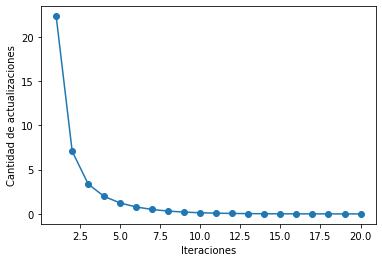

In [7]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()